In [3]:
import pandas as pd
import plotly.express as px
 


In [23]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 606.7 kB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 598.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 1.4 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21/21 [streamlit]21 [streamlit]]malizer]


In [7]:
smartphone_data = pd.read_csv('smartphones.csv')



In [8]:
smartphone_data.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

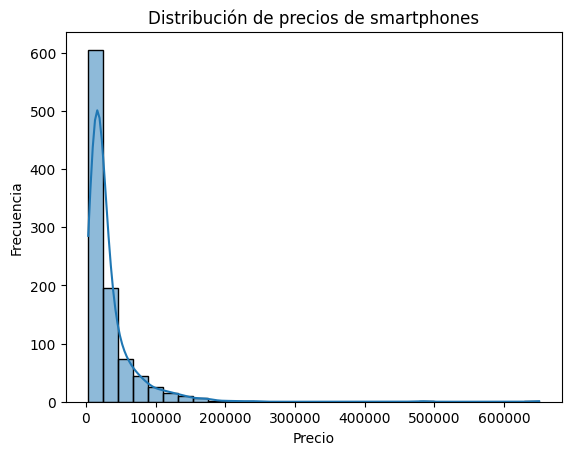

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=smartphone_data, x='price', bins=30, kde=True)
plt.title('Distribución de precios de smartphones')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


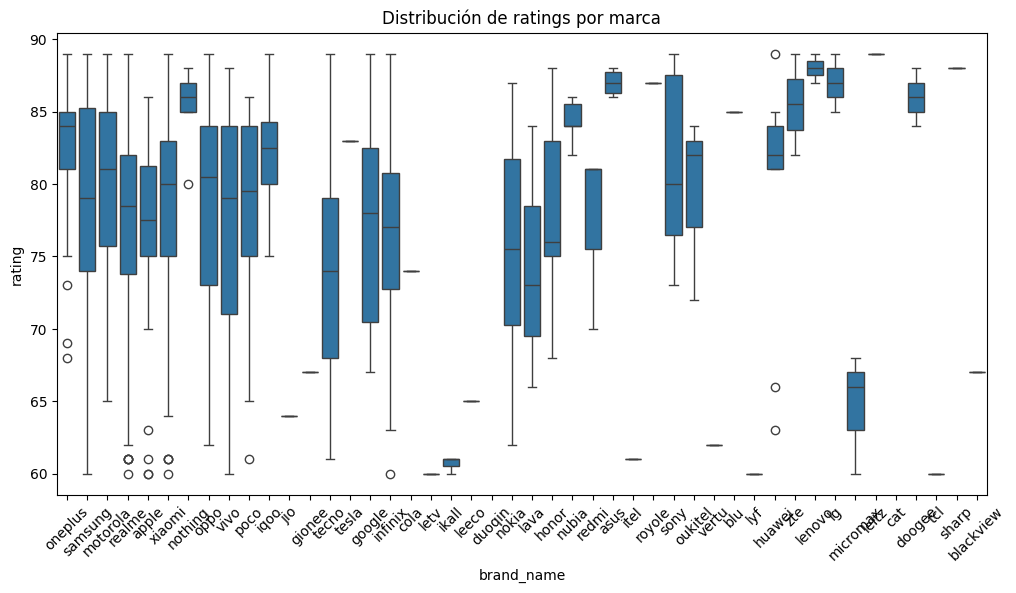

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=smartphone_data, x='brand_name', y='rating')
plt.title('Distribución de ratings por marca')
plt.xticks(rotation=45)
plt.show()


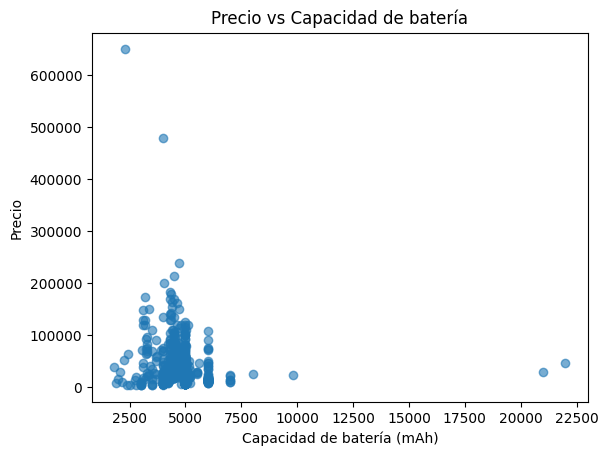

In [13]:
plt.scatter(smartphone_data['battery_capacity'], smartphone_data['price'], alpha=0.6)
plt.title('Precio vs Capacidad de batería')
plt.xlabel('Capacidad de batería (mAh)')
plt.ylabel('Precio')
plt.show()


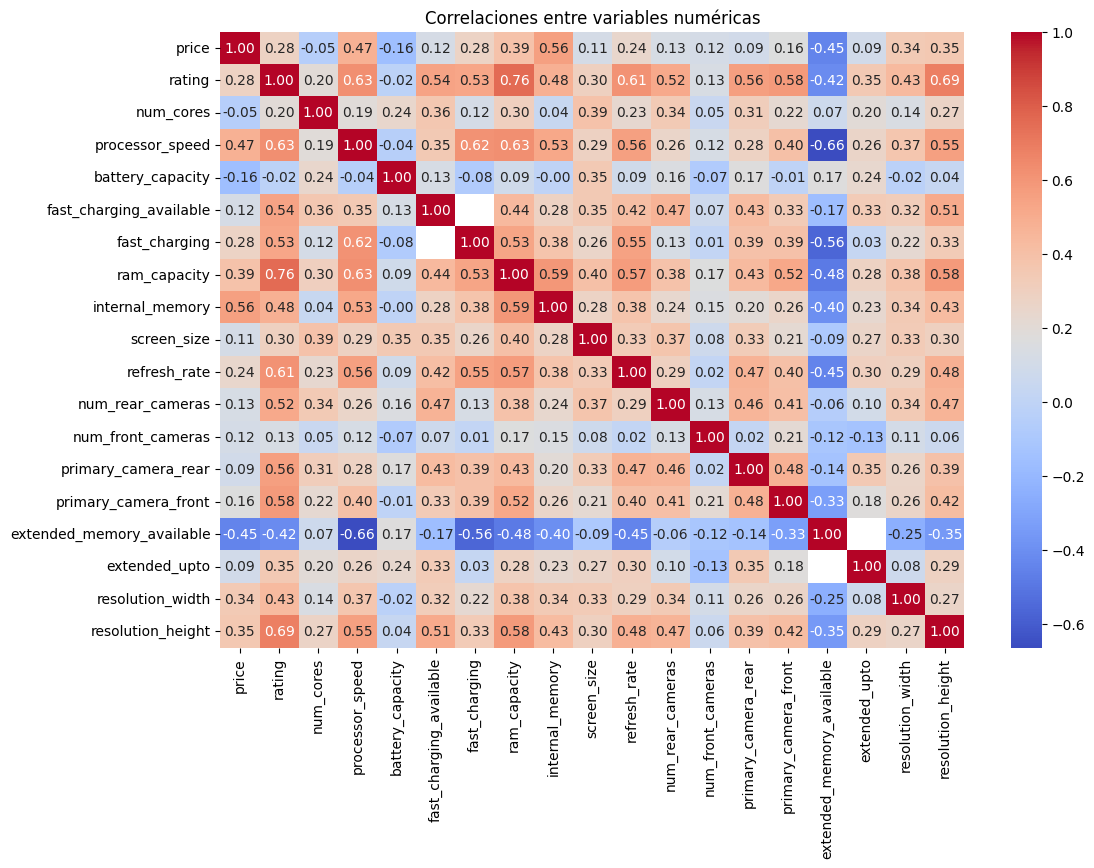

In [14]:
corr = smartphone_data.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones entre variables numéricas')
plt.show()


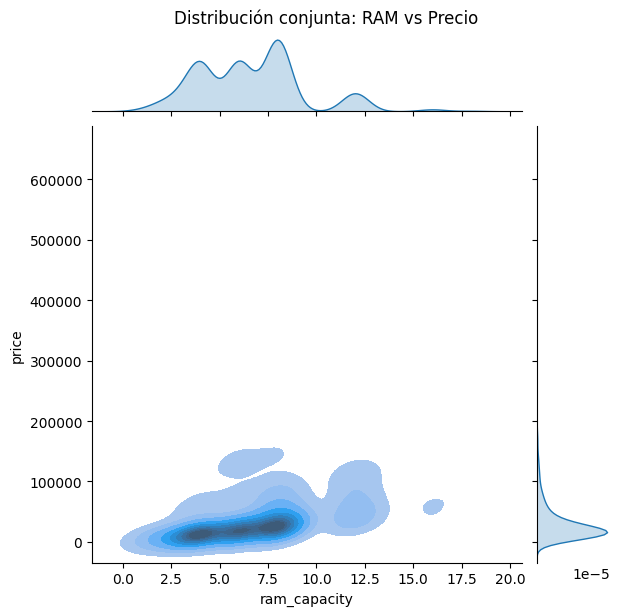

In [15]:
sns.jointplot(data=smartphone_data, x='ram_capacity', y='price', kind='kde', fill=True)
plt.suptitle('Distribución conjunta: RAM vs Precio', y=1.02)
plt.show()


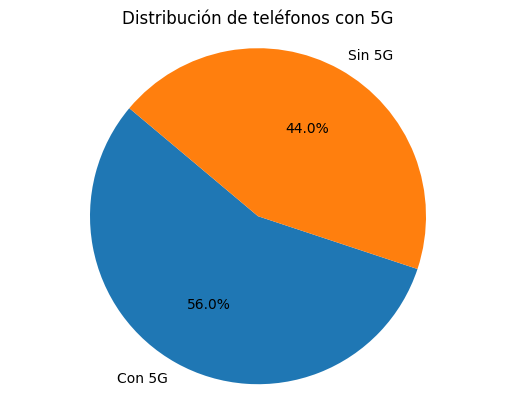

In [16]:
labels = ['Con 5G', 'Sin 5G']
sizes = smartphone_data['has_5g'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de teléfonos con 5G')
plt.axis('equal')
plt.show()


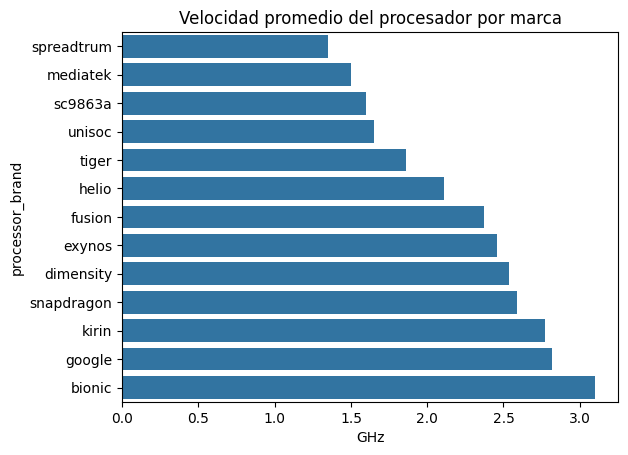

In [17]:
avg_speed = smartphone_data.groupby('processor_brand')['processor_speed'].mean().sort_values()
sns.barplot(x=avg_speed.values, y=avg_speed.index)
plt.title('Velocidad promedio del procesador por marca')
plt.xlabel('GHz')
plt.show()


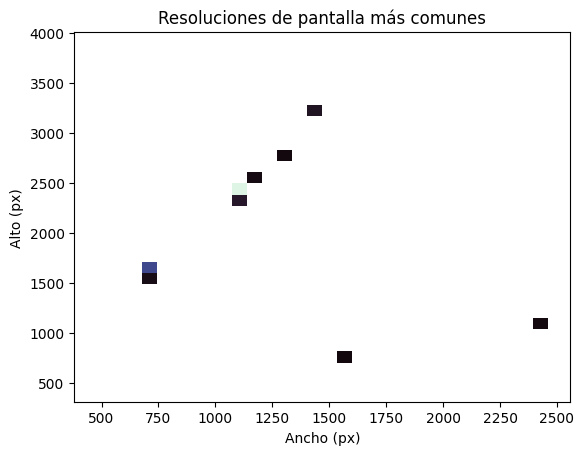

In [19]:
sns.histplot(data=smartphone_data, x='resolution_width', y='resolution_height', bins=30, pthresh=.1, cmap="mako")
plt.title('Resoluciones de pantalla más comunes')
plt.xlabel('Ancho (px)')
plt.ylabel('Alto (px)')
plt.show()


In [20]:
from scipy.stats import ttest_ind

nfc_yes = smartphones[smartphones['has_nfc'] == True]['rating'].dropna()
nfc_no = smartphones[smartphones['has_nfc'] == False]['rating'].dropna()

t_stat, p_value = ttest_ind(nfc_yes, nfc_no, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

sns.boxplot(data=smartphones, x='has_nfc', y='rating')
plt.title('Rating de smartphones con vs sin NFC')
plt.xticks([0, 1], ['Sin NFC', 'Con NFC'])
plt.show()


NameError: name 'smartphones' is not defined

In [21]:
!pip install scipy

T-statistic: 17.02, p-value: 0.0000


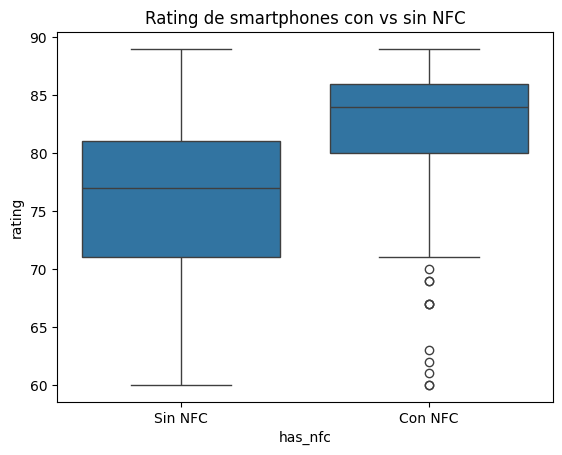

In [22]:
from scipy.stats import ttest_ind

nfc_yes = smartphone_data[smartphone_data['has_nfc'] == True]['rating'].dropna()
nfc_no = smartphone_data[smartphone_data['has_nfc'] == False]['rating'].dropna()

t_stat, p_value = ttest_ind(nfc_yes, nfc_no, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

sns.boxplot(data=smartphone_data, x='has_nfc', y='rating')
plt.title('Rating de smartphones con vs sin NFC')
plt.xticks([0, 1], ['Sin NFC', 'Con NFC'])
plt.show()
